## Initial Data Analysis

# Step 1: Open the sat_scores.csv file. Investigate the data, and answer the questions below.

# AND 

# Step 2: Load the data.

### 4. Load the data into a list of lists and 5. Print the data

In [1]:
import scipy as sci
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember that for specific functions, the array function in numpy 
# can be useful in listing out the elements in a list (example would
# be for finding the mode.)

with open('./data/sat_scores.csv', 'r') as f:
    data = [i.split(",") for i in f.read().split()]
    print data

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

### 1. What does the data describe?

The data describes SAT scores for verbal and math sections in 2001 across the US. It does appear to be complete, except for the issue I'm having with the median score for math. When I ran the median function for sat_scores.math, it returned a value of 521. However, I could not find that value in the dataset. Below are some other observations I made. 

### 2. Does the data look complete? Are there any obvious issues with the observations?¶


Overall, the data does look complete, but doing my EDA I noticed that the median value computed for Math, 521, does not actually appear in the list of Math scores. There must be an issue with the data. 

### 6. Extract a list of the labels from the data, and remove them from the data.

In [2]:
header = data[0]
data = data[1:]
print(header)

['State', 'Rate', 'Verbal', 'Math']


### 3. Create a data dictionary for the dataset.

In [3]:
sat_data = {}

for index, column_name in enumerate(header):
   sat_data[column_name] = []
   for row in data:
       sat_data[column_name].append(row[index])

### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [4]:
state_names = sat_data['State']
print state_names

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


### 8. Print the types of each column


In [5]:
print 'The type of the State column is' + ' ' + str(type (sat_data['State'][2]))

print 'The type of the State column is' + ' ' + str(type (sat_data['Math'][2]))

print 'The type of the State column is' + ' ' + str(type (sat_data['Verbal'][2]))

print 'The type of the State column is' + ' ' + str(type (sat_data['Rate'][2]))

The type of the State column is <type 'str'>
The type of the State column is <type 'str'>
The type of the State column is <type 'str'>
The type of the State column is <type 'str'>


### 9. Do any types need to be reassigned? If so, go ahead and do it. 

In [6]:
#Math, Verbal, and Rate need to be reassigned to integers. 
for item in sat_data['Math']:
    item = int(item)

In [7]:
for item in sat_data['Verbal']:
    item = int(item)

In [8]:
for item in sat_data['Rate']:
    item = int(item)

### 10. Create a dictionary for each column mapping the State to its respective value for that column.

In [9]:
verbal_values = {x:sat_data['Verbal'] for x in state_names}
math_values = {x:sat_data['Math'] for x in state_names}
rate_values = {x:sat_data['Rate'] for x in state_names}

### 11. Create a dictionary with the values for each of the numeric columns

In [10]:
#SAT_values = {x:sat_data['Verbal'] for x in sat_data['Verbal']}

# # Step 3: Describe the data

### 12. Print the min and max of each column

In [11]:
#Convert to a pandas dataframe to perform functions. 
SAT_scores = pd.DataFrame(sat_data)
SAT_scores['Math'] = SAT_scores.Math.astype(int)
SAT_scores['Verbal'] = SAT_scores.Verbal.astype(int)
SAT_scores['Rate'] = SAT_scores.Rate.astype(int)

In [12]:
print 'The minimum Verbal score is' + ' ' + str(min(SAT_scores.Verbal))
print 'The maximum Verbal score is' + ' ' + str(max(SAT_scores.Verbal))
print 'The minimum Math score is' + ' ' + str(min(SAT_scores.Math))
print 'The maximum Math score is' + ' ' + str(max(SAT_scores.Math))
print 'The minimum Rate is' + ' ' + str(min(SAT_scores.Rate))
print 'The maximum Rate is' + ' ' + str(max(SAT_scores.Rate))

The minimum Verbal score is 482
The maximum Verbal score is 593
The minimum Math score is 439
The maximum Math score is 603
The minimum Rate is 4
The maximum Rate is 82


#### The miniumum rate is 4, found in North Dakota, South Dakota, and Mississippi, and the maximum rate is 82 found in Connecticut.

#### The minimum verbal score is 482 in D.C., and the maximum is 593 in Iowa.

#### The median verbal score is 526 in Oregon. 

#### The minimum math score is 439 in Ohio, and the maximum is 603, which is interestingly also in Iowa.

#### The median math score is 521. 

#### Iowa has the highest SAT Scores in the country overall.

### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [13]:
#Standard Deviation function. 
from math import sqrt
def standard_deviation(column):
    num_int = len(column)
    mean = sum(column)/len(column)
    differences = [x - mean for x in column]
    sq_diff = [t ** 2 for t in differences]
    num = sum(sq_diff)
    den = len(column)-1
    var = num/den
    print sqrt(var)
    

In [14]:
standard_deviation(SAT_scores['Math'])

36.0138862107


In [15]:
standard_deviation(SAT_scores['Verbal'])

33.2264954517


In [16]:
standard_deviation(SAT_scores['Rate'])

27.2946881279


In [18]:
#Check to see the standard deviations are right. 
print SAT_scores.describe()
#Approximately on point. 

             Math       Rate      Verbal
count   52.000000  52.000000   52.000000
mean   531.500000  37.153846  532.019231
std     36.014975  27.301788   33.236225
min    439.000000   4.000000  482.000000
25%    504.000000   9.000000  501.000000
50%    521.000000  33.500000  526.500000
75%    555.750000  63.500000  562.000000
max    603.000000  82.000000  593.000000


## Mean, Median and Mode in NumPy and SciPy

In [19]:
# Find the mean, median, and mode for the set of verbal scores and the set of math scores. 
import numpy as np
print np.median(SAT_scores.Verbal)
print np.median(SAT_scores.Math)
#Numpy doesn't have a built in function for mode. However, stats does; 
#its function returns the mode, and how many times the mode appears.
verb_mode = stats.mode(SAT_scores.Verbal)
math_mode = stats.mode(SAT_scores.Math)
print verb_mode
print math_mode

526.5
521.0
ModeResult(mode=array([562]), count=array([3]))
ModeResult(mode=array([499]), count=array([6]))


### The median Verbal SAT score is 526, its mean is approximately 532, and its mode is above its mean at 562 (appears, 3 times).
### The median Math SAT score is 521, its mean is 531.5, and its mode is below its mean at 499 (appears 6 times). 

# Step 4: Visualize the data¶

In [ ]:
#Will be using Pandas dataframe for plotting. 

## 19. Plot some scatterplots. BONUS: Use a PyPlot figure to present multiple plots at once.

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt

## Scatter Plotting 

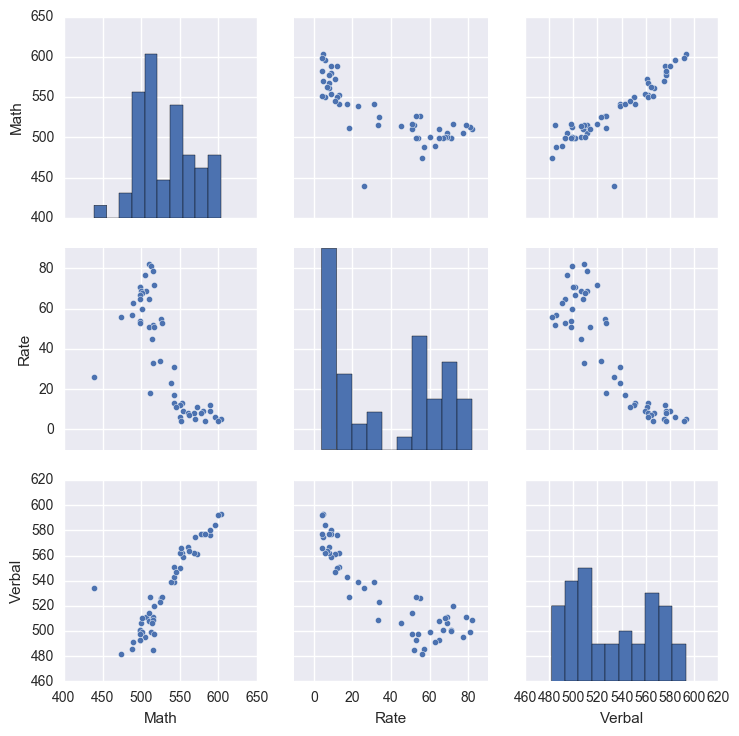

In [21]:
sns.pairplot(SAT_scores)
plt.show()

### 20. Are there any interesting relationships to note?

Both Verbal and Math scores are highly correlated with each other, whichever way you plot them, with Math appearing to affect Verbal at a faster rate than the other way around.

In [22]:
# Not really. I had already assigned the Verbal, Math, and Rate columns to integers, 
# so no conversion is needed there.

### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [57]:
SAT_scores['Verbal'] = SAT_scores['Verbal'].apply(pd.to_numeric)

In [58]:
SAT_scores['Math'] = SAT_scores['Math'].apply(pd.to_numeric)

In [59]:
SAT_scores['Rate'] = SAT_scores['Rate'].apply(pd.to_numeric)

In [60]:
SAT_scores.dtypes

Math       int64
Rate       int64
State     object
Verbal     int64
dtype: object

## 21. Create box plots for each variable.

In [24]:
# Display box plots to visualize the distribution of the datasets. 
# Recall the median verbal score is 526, the mean is 532, the max is 593, the min is 482, 
# and the std. deviation is 33.236.

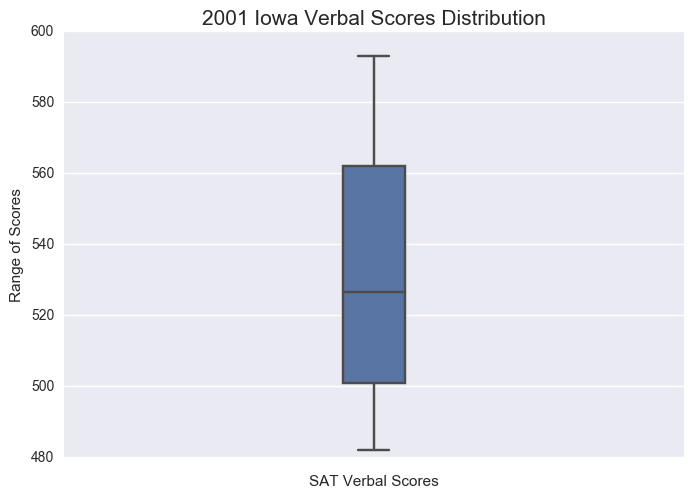

In [25]:
ax = sns.boxplot(y=SAT_scores.Verbal, saturation=0.75, width=0.1, fliersize=5)
ax.set(xlabel = 'SAT Verbal Scores', ylabel = 'Range of Scores') 
ax.set_title('2001 Iowa Verbal Scores Distribution', fontsize = 15)
plt.show()

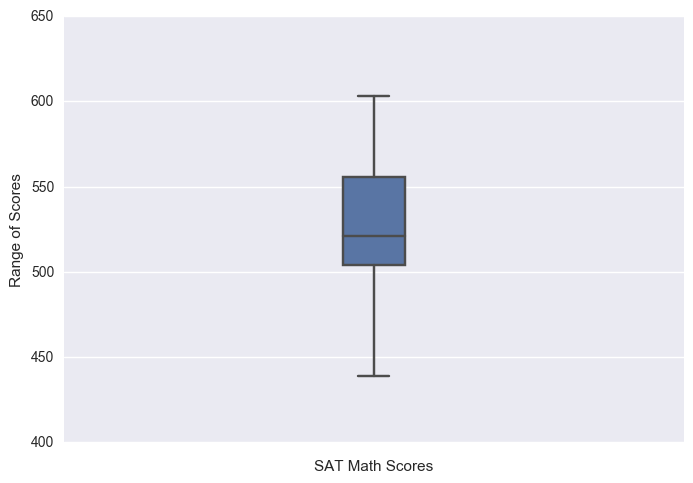

In [27]:
sns.boxplot(data = SAT_scores, y=SAT_scores.Math, saturation=0.75, width=0.1, fliersize=5)
plt.xlabel('SAT Math Scores')
plt.ylabel('Range of Scores')
plt.show()

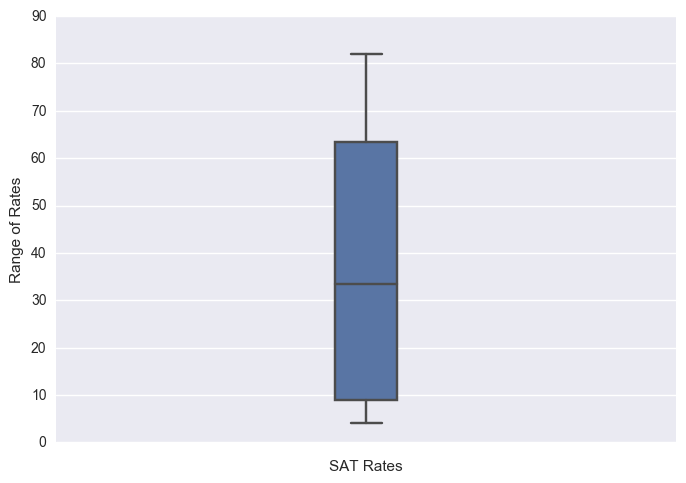

In [93]:
sns.boxplot(data = SAT_scores, y=SAT_scores.Rate, saturation=0.75, width=0.1, fliersize=5)
plt.xlabel('SAT Rates')
plt.ylabel('Range of Rates')
plt.show()

## 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms

## Histograms

## 15. Plot the Math distribution

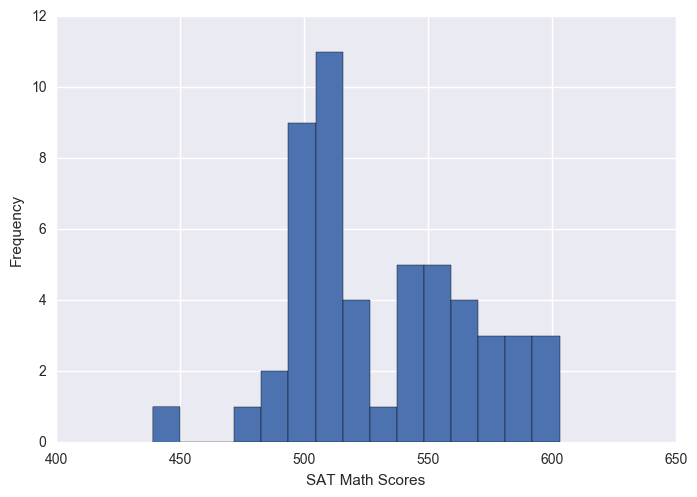

In [81]:
SAT_scores.Math.plot (kind='hist', bins=15)
plt.xlabel('SAT Math Scores')
plt.ylabel('Frequency')
plt.show()

## 16. Plot the Verbal distribution

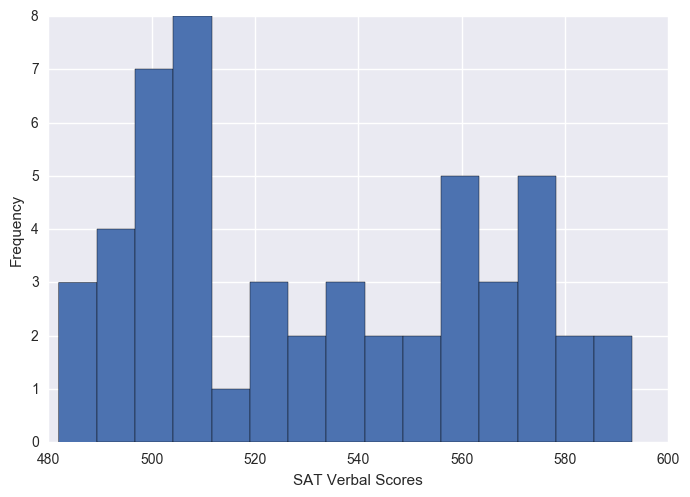

In [28]:
SAT_scores.Verbal.plot (kind='hist', bins=15)
plt.xlabel('SAT Verbal Scores')
plt.ylabel('Frequency')
plt.show()

## 16. Plot the Rate distribution

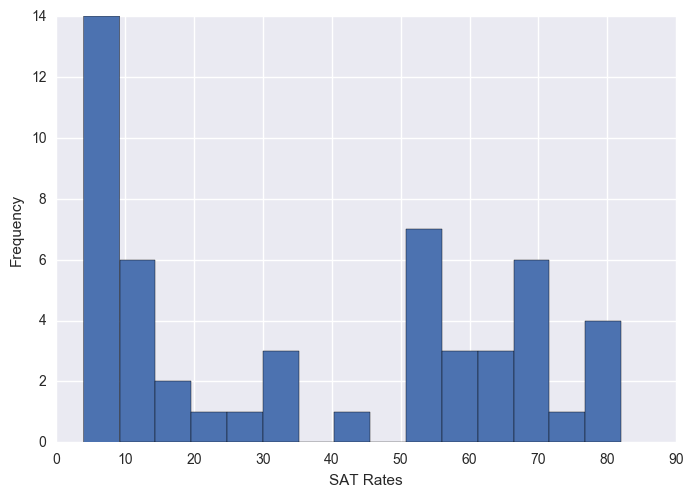

In [82]:
SAT_scores.Rate.plot (kind='hist', bins=15)
plt.xlabel('SAT Rates')
plt.ylabel('Frequency')
plt.show()

### 17. What is the typical assumption for data distribution? and 18. Does that distribution hold true for our data?

#### The typical assumption of data distribution is that it should follow a normal distribution, with standard deviations being relatively equal on both sides of the mean. Neither of the histograms appear to follow a normal distribution, with the Verbal scores in particular following a right/positive skew. But I need to properly check for normal distribution, and find a way the relative distribution onto the histograms. Perhaps Seaborn has a function that can help me with that. 

## Seaborn Plotting for Histograms and Fitting a Distribution

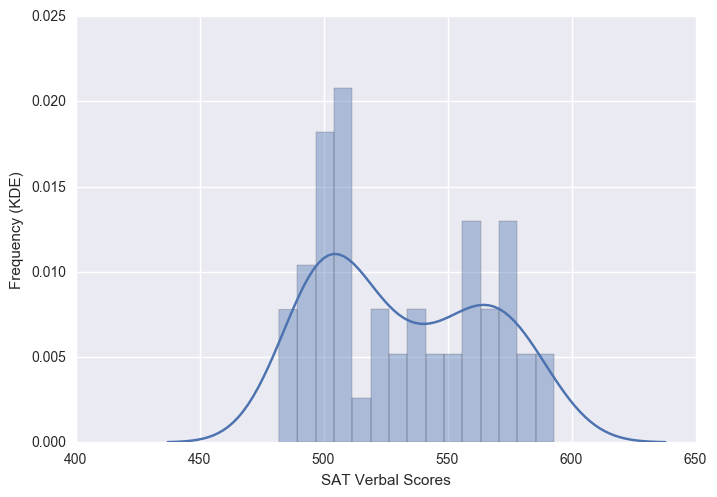

In [29]:
# Used seaborn website as guidance: http://seaborn.pydata.org/tutorial/distributions.html
# I used a feature called the 'Kernel Density Estimation" (KDE) to
# visualize a distribution to the data. 
# KDE is an estimator that uses each data point to make an estimate of the distibution and attempts to 
# smooth it out on the histogram. 
# This resulting curve has an area below it equal to one, hence the decimal units for frequency.
sns.distplot(SAT_scores.Verbal, bins=15)
plt.xlabel('SAT Verbal Scores')
plt.ylabel('Frequency (KDE)')
plt.show()

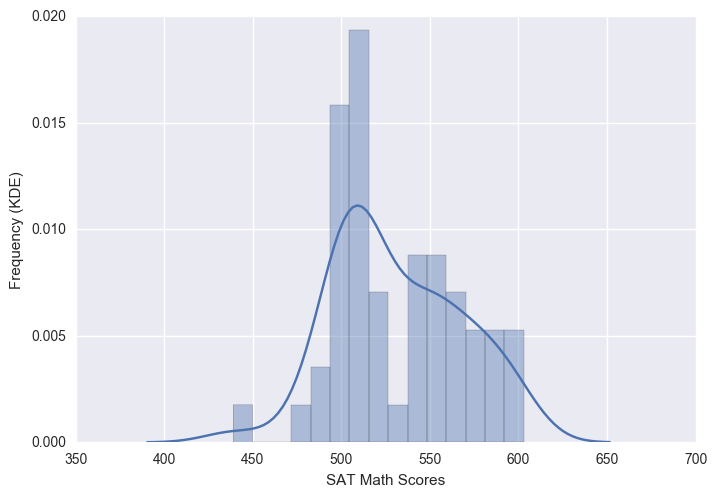

In [30]:
sns.distplot(SAT_scores.Math, bins=15)
plt.xlabel('SAT Math Scores')
plt.ylabel('Frequency (KDE)')
plt.show()

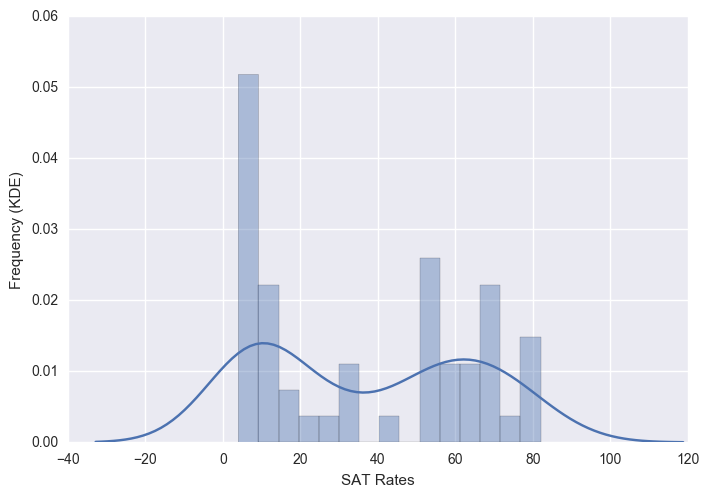

In [31]:
sns.distplot(SAT_scores.Rate, bins=15)
plt.xlabel('SAT Rates')
plt.ylabel('Frequency (KDE)')
plt.show()

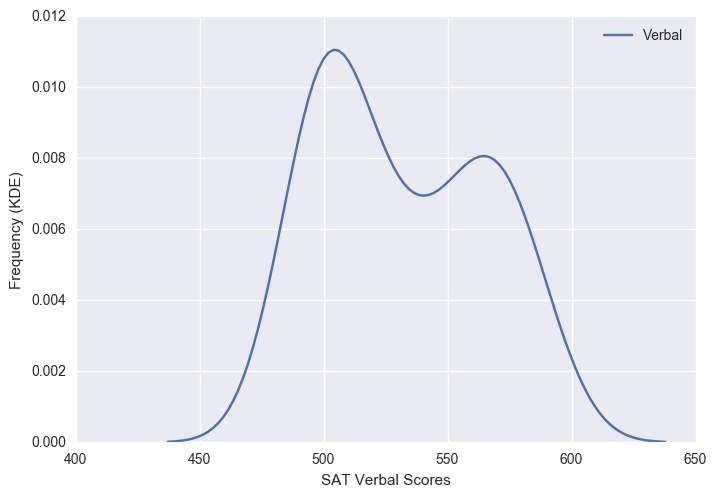

In [32]:
sns.kdeplot(SAT_scores.Verbal)
plt.xlabel('SAT Verbal Scores')
plt.ylabel('Frequency (KDE)')
plt.show()

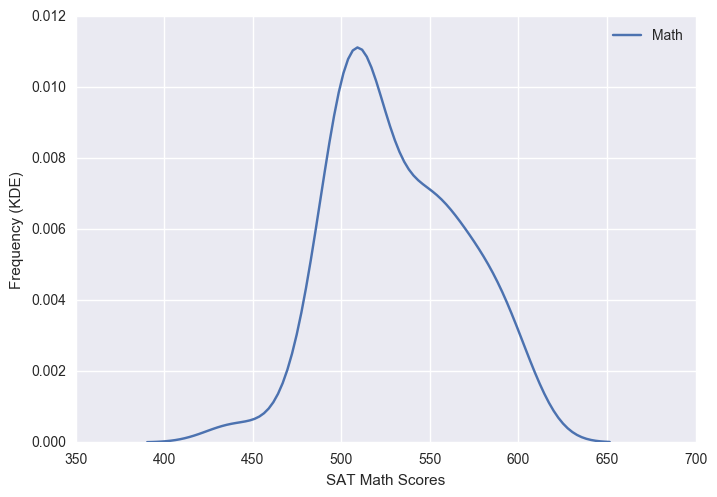

In [33]:
sns.kdeplot(SAT_scores.Math)
plt.xlabel('SAT Math Scores')
plt.ylabel('Frequency (KDE)')
plt.show()

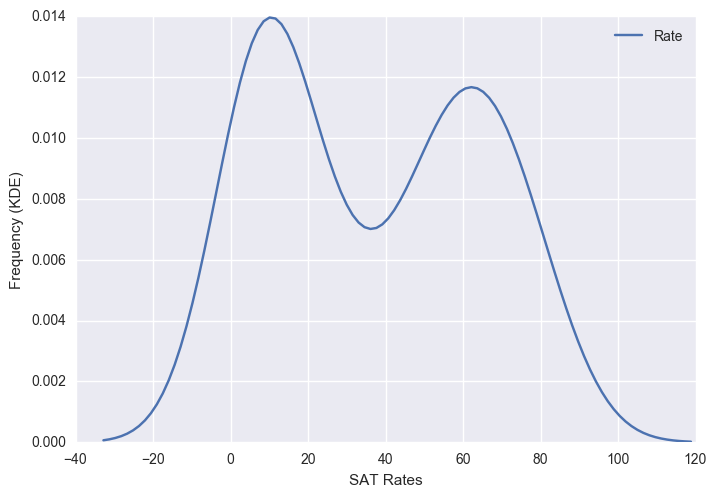

In [34]:
sns.kdeplot(SAT_scores.Rate)
plt.xlabel('SAT Rates')
plt.ylabel('Frequency (KDE)')
plt.show()

### Both the Verbal and Math scores appear to follow a right/positively skewed distribution.  The Rate score appears to follow something close to a normal distribution, but without a distinct peak--instead it has two. 